In [1]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=pd.read_sql_query("Select * from earning",db)
data["DomWorldCombined"] = data["Domestic"] + data["Worldwide"]
maxV=data["DomWorldCombined"].max()
d=data[data["DomWorldCombined"] == maxV]
movie_id=d.iloc[0,0]
cur.execute('Select rating from IMDB where Movie_id=?',(movie_id,))
rows=cur.fetchone()
db.close()
print(rows[0])

8.1


In [2]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=pd.read_sql_query("Select I.*,E.Domestic,E.Worldwide from earning E  left outer join IMDB I on I.Movie_id = E.Movie_id where I.Budget is not null",db)
data["Final"]=data["Domestic"]+data["Worldwide"]
maxV=data["Final"].max()
d=data[data["Final"]==maxV]
movie_id=d.iloc[0,0]
cur.execute('Select Title from IMDB where Movie_id=?',(movie_id,))
rows=cur.fetchone()
db.close()
length=len(rows)
print(rows[0][0:length-6],rows[0][length-8:length-2])

Star Wars: The Force Awakens (  (2015


In [62]:
import sqlite3
import pandas as pd
import numpy as np
db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=pd.read_sql_query("Select I.Movie_id,I.Budget,g.genre from IMDB I inner join genre g on I.Movie_id=g.Movie_id",db)
data["Budget"] = data["Budget"].fillna(0)
data["Budget"]=pd.to_numeric(data["Budget"], downcast="float")
#print(data["Budget"].describe())
das=data.groupby(by=["genre"])["Budget"].sum()
indexes=das.index
final_values=das.values
perc=np.true_divide(final_values, final_values.sum(axis=0))*100
for i in range(len(indexes)):
    if indexes[i]!='':
        print(indexes[i],format(perc[i],'.2f'))

Action 16.98
Adventure 23.70
Animation 7.23
Biography 2.45
Comedy 6.82
Crime 1.67
Drama 10.25
Family 1.80
Fantasy 4.29
History 0.68
Horror 0.03
Music 0.15
Musical 0.24
Mystery 1.84
Romance 1.06
Sci-Fi 10.18
Sport 0.43
Thriller 3.77
War 0.34
Western 0.54


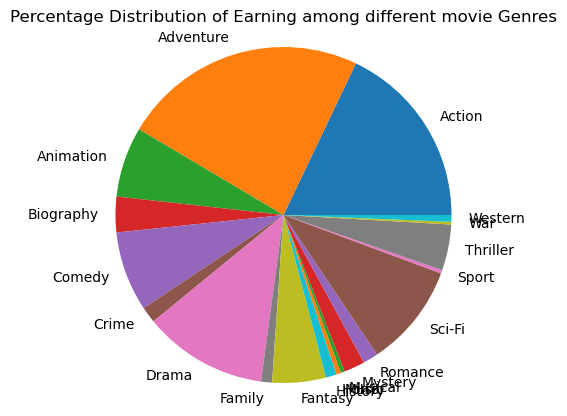

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=pd.read_sql_query("Select I.Movie_id,I.Budget,g.genre,eg.Domestic,eg.Worldwide from IMDB I left outer join genre g on I.Movie_id=g.Movie_id left outer join earning eg on eg.Movie_id=I.Movie_id where g.genre is not null",db)
data["Final"]=data["Domestic"]+data["Worldwide"]
das=data.groupby(by=["genre"])["Final"].sum()
indexes=das.index
final_values=das.values
li=[]
si=[]
for i in range(len(indexes)):
    if indexes[i] !='':
        si.append(indexes[i])
        li.append(final_values[i])
np_value=np.array(li,dtype=float)
perc=np.true_divide(np_value, np_value.sum(axis=0))*100
plt.pie(perc,labels=si)
plt.axis("equal")
plt.title("Percentage Distribution of Earning among different movie Genres")
plt.show()
for i in range(len(si)):
    print(si[i],format(perc[i],'.2f'))

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=pd.read_sql_query("Select I.Title from IMDB I inner join genre g on I.Movie_id=g.Movie_id where I.rating >=8 and g.genre in ('Sci-Fi','Mystery')  group by I.Title",db)
print(data["Title"].to_string(index=False))

                   Arrival (2016)
                 Gone Girl (2014)
   Guardians of the Galaxy (2014)
                       Her (2013)
                 Inception (2010)
              Interstellar (2014)
        Mad Max: Fury Road (2015)
                 Prisoners (2013)
            Shutter Island (2010)
              The Avengers (2012)
               The Martian (2015)
X-Men: Days of Future Past (2014)
